In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Add latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding he cities
cities = []

# Identify the nearest city for each lat long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If city is unique, add to list
    if city not in cities:
        cities.append(city)
        
# Print city count to confirm sufficient count
len(cities)

640

In [7]:
# Import requests library
import requests

# Import api_key
from config import weather_api_key as api_key

# Import the datetime module from the datetime library
from datetime import datetime

# Build base url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [8]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing record 1 of Set 1 | amderma
City not found. Skipping...
Processing record 2 of Set 1 | nizhneyansk
City not found. Skipping...
Processing record 3 of Set 1 | lata
Processing record 4 of Set 1 | tiksi
Processing record 5 of Set 1 | ushuaia
Processing record 6 of Set 1 | clacton-on-sea
Processing record 7 of Set 1 | lorengau
Processing record 8 of Set 1 | cape town
Processing record 9 of Set 1 | souillac
Processing record 10 of Set 1 | kapaa
Processing record 11 of Set 1 | rikitea
Processing record 12 of Set 1 | concarneau
Processing record 13 of Set 1 | mar del plata
Processing record 14 of Set 1 | moose factory
Processing record 15 of Set 1 | mount isa
Processing record 16 of Set 1 | port alfred
Processing record 17 of Set 1 | vostok
Processing record 18 of Set 1 | norman wells
Processing record 19 of Set 1 | sumbawa
City not found. Skipping...
Processing record 20 of Set 1 | vaini
Processing record 21 of Set 1 | sa

Processing record 39 of Set 4 | port-gentil
Processing record 40 of Set 4 | balarampur
Processing record 41 of Set 4 | hailin
Processing record 42 of Set 4 | klaksvik
Processing record 43 of Set 4 | ormara
Processing record 44 of Set 4 | aflu
City not found. Skipping...
Processing record 45 of Set 4 | zharkent
Processing record 46 of Set 4 | flinders
Processing record 47 of Set 4 | boa vista
Processing record 48 of Set 4 | ilulissat
Processing record 49 of Set 4 | airai
Processing record 50 of Set 4 | sur
Processing record 1 of Set 5 | leirvik
Processing record 2 of Set 5 | umzimvubu
City not found. Skipping...
Processing record 3 of Set 5 | touros
Processing record 4 of Set 5 | butaritari
Processing record 5 of Set 5 | neiafu
Processing record 6 of Set 5 | ardabil
Processing record 7 of Set 5 | yakima
Processing record 8 of Set 5 | pevek
Processing record 9 of Set 5 | novomykolayivka
Processing record 10 of Set 5 | cabo san lucas
Processing record 11 of Set 5 | marfino
Processing reco

Processing record 26 of Set 8 | port blair
Processing record 27 of Set 8 | alofi
Processing record 28 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing record 29 of Set 8 | bulgan
Processing record 30 of Set 8 | constitucion
Processing record 31 of Set 8 | san andres
Processing record 32 of Set 8 | nuzvid
Processing record 33 of Set 8 | guaratuba
Processing record 34 of Set 8 | novoorsk
Processing record 35 of Set 8 | muroto
Processing record 36 of Set 8 | tete
Processing record 37 of Set 8 | vestmanna
Processing record 38 of Set 8 | padang
Processing record 39 of Set 8 | margate
Processing record 40 of Set 8 | bakel
Processing record 41 of Set 8 | maldonado
Processing record 42 of Set 8 | houston
Processing record 43 of Set 8 | ambulu
Processing record 44 of Set 8 | sao filipe
Processing record 45 of Set 8 | lasa
Processing record 46 of Set 8 | bambanglipuro
Processing record 47 of Set 8 | kamenskoye
City not found. Skipping...
Processing record 48 of Set 8 | bered

Processing record 16 of Set 12 | natchitoches
Processing record 17 of Set 12 | victoria point
Processing record 18 of Set 12 | kuznechnoye
Processing record 19 of Set 12 | pilar
Processing record 20 of Set 12 | sabancuy
Processing record 21 of Set 12 | kushima
Processing record 22 of Set 12 | sorland
Processing record 23 of Set 12 | sistranda
Processing record 24 of Set 12 | bluefield
Processing record 25 of Set 12 | kijang
Processing record 26 of Set 12 | myitkyina
Processing record 27 of Set 12 | selty
Processing record 28 of Set 12 | marsa matruh
Processing record 29 of Set 12 | komyshnya
Processing record 30 of Set 12 | lac du bonnet
Processing record 31 of Set 12 | corinto
Processing record 32 of Set 12 | bargal
City not found. Skipping...
Processing record 33 of Set 12 | tutoia
Processing record 34 of Set 12 | floro
Processing record 35 of Set 12 | mendi
Processing record 36 of Set 12 | yueyang
Processing record 37 of Set 12 | marzuq
Processing record 38 of Set 12 | orchard homes

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lata,40.1629,-8.3327,62.01,94,100,1.77,PT,2021-04-14 20:38:12
1,Tiksi,71.6872,128.8694,3.16,96,100,2.80,RU,2021-04-14 20:42:13
2,Ushuaia,-54.8000,-68.3000,46.40,46,20,18.41,AR,2021-04-14 20:42:13
3,Clacton-On-Sea,51.7897,1.1560,41.00,78,23,5.01,GB,2021-04-14 20:42:14
4,Lorengau,-2.0226,147.2712,81.28,74,59,6.49,PG,2021-04-14 20:42:14
5,Cape Town,-33.9258,18.4232,64.99,88,0,8.05,ZA,2021-04-14 20:40:01
6,Souillac,-20.5167,57.5167,78.80,78,40,6.91,MU,2021-04-14 20:42:15
7,Kapaa,22.0752,-159.3190,78.80,57,40,13.80,US,2021-04-14 20:42:15
8,Rikitea,-23.1203,-134.9692,77.90,69,8,5.91,PF,2021-04-14 20:42:16
9,Concarneau,47.8750,-3.9225,46.40,57,0,11.50,FR,2021-04-14 20:42:16


In [12]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lata,PT,2021-04-14 20:38:12,40.1629,-8.3327,62.01,94,100,1.77
1,Tiksi,RU,2021-04-14 20:42:13,71.6872,128.8694,3.16,96,100,2.80
2,Ushuaia,AR,2021-04-14 20:42:13,-54.8000,-68.3000,46.40,46,20,18.41
3,Clacton-On-Sea,GB,2021-04-14 20:42:14,51.7897,1.1560,41.00,78,23,5.01
4,Lorengau,PG,2021-04-14 20:42:14,-2.0226,147.2712,81.28,74,59,6.49
5,Cape Town,ZA,2021-04-14 20:40:01,-33.9258,18.4232,64.99,88,0,8.05
6,Souillac,MU,2021-04-14 20:42:15,-20.5167,57.5167,78.80,78,40,6.91
7,Kapaa,US,2021-04-14 20:42:15,22.0752,-159.3190,78.80,57,40,13.80
8,Rikitea,PF,2021-04-14 20:42:16,-23.1203,-134.9692,77.90,69,8,5.91
9,Concarneau,FR,2021-04-14 20:42:16,47.8750,-3.9225,46.40,57,0,11.50


In [13]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps =  city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

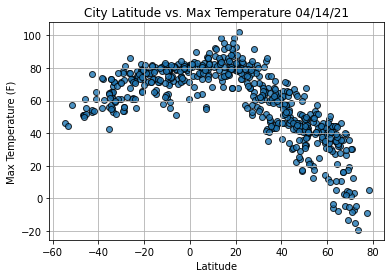

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig1.png')

# Show plot
plt.show()

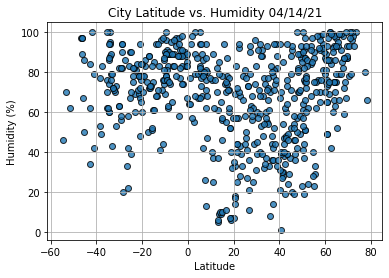

In [20]:
# Build the scatter plot for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig2.png')

# Show plot
plt.show()

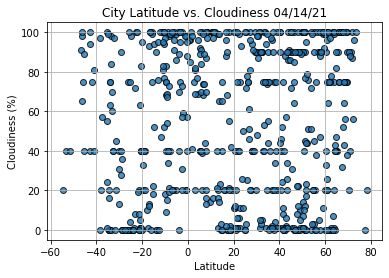

In [21]:
# Build the scatter plot for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig3.png')

# Show plot
plt.show()

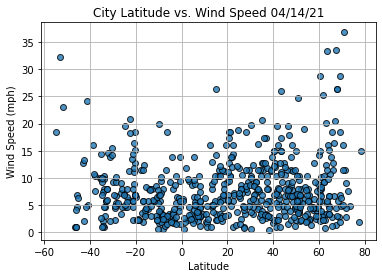

In [22]:
# Build the scatter plot for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()

# Save figure
plt.savefig('weather_data/Fig4.png')

# Show plot
plt.show()